<a href="https://colab.research.google.com/github/MarioBolanos/Modelado-y-Simulacion/blob/master/2_One-Dimensional%20Flows/Ejercicios_Cap2_Strogatz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 2
 
 Flows in the line

In [16]:
from sympy import pi
import matplotlib.pyplot as plt
import numpy as np

def step_euler(y,h,f):
  next_y=y+h*f(y)
  return next_y


def euler (h,f,y_0,start_t,end_t):
  N= int((end_t - start_t)/h)
  t_list=np.linspace(start_t,end_t,N+1)
  y_list=np.zeros(N+1)
  y_list[0]=y_0
  for i in range(0,N):
    y_list[i+1]=step_euler(y_list[i],h,f)

  return t_list,y_list



##**2.1.1** 
Encuentra todos los puntos fijos del flujo. 

**Solución**

\begin{equation} 
sin(x)=0\\
x= n\pi, n\in\mathbb Z\\
\frac{dx}{dt}=sin(x)\\
t=\int\ csc(x)dx\\
t=\int\ csc(x)(csc(x)+cot(x))csc(x)+cot(x)dx\\
t=\int\ csc2(x)+cot(x)csc(x)csc(x)+cot(x)dx \\
sustitucion:\\
u=csc(x)+cot(x)\ \\
\longrightarrow\ \frac{du}{dx}=-{csc}^2(x)-cot(x)csc(x)\\
\longrightarrow\ dx=1-{csc}^2(x)-cot(x)csc(x)du\\
t=-\int1/udu\\
t=-ln(u)\\
t=-ln(csc(x)+cot(x))\\
x=\frac{1}{2} i e^{-i x} - \frac{1}{2} i e^{i x}
\end{equation}

Busqueda de puntos fijos
\begin{equation}
\dot{x}=sin(x)\\
\ddot{x}=cos(x)\\
\end{equation}
Buscamos los puntos $x^{*}$ 
\begin{equation}
sin(x^{*})=0\\
x^{*}_{1}=2\pi n,\:x^{*}_{2}=\pi +2\pi n
\end{equation}
Luego

$\ddot{x}(x^{*}_{1})=cos(2\pi n)=1 \rightarrow$ punto fijo inestable\
$\ddot{x}(x^{*}_{2})=cos(\pi+2\pi n)=-1 \rightarrow$ punto fijo estable

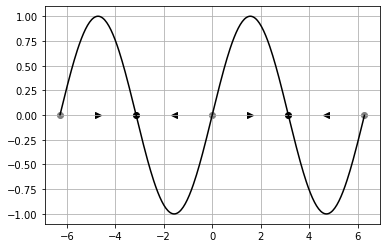

In [17]:
from sympy import pi
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(-2*3.14, 2*3.14, 300)
y=np.sin(x)
plt.plot(x, y, color='black')
plt.grid()
plt.scatter(0,0,color='grey', marker='o')
plt.scatter(3.14*0.5,0, color='black', marker='>')
plt.scatter(3.14,0, color='black', marker='o')
plt.scatter(-3.14*0.5,0, color='black', marker='<')
plt.scatter(-3.14,0, color='black', marker='o')
plt.scatter(3.14+3.14*0.5,0, color='black', marker='<')
plt.scatter(2*3.14,0, color='grey', marker='o')
plt.scatter(2*-3.14,0, color='grey', marker='o')
plt.scatter(-3.14-3.14*0.5,0, color='black', marker='>')
plt.grid(True)

1020.8581558224744


(0.0, 10.0, 0.0, 6.0)

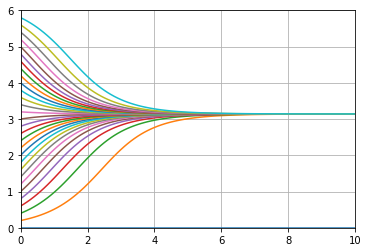

In [18]:
def Ejemplo2_1(x):
  dx=np.sin(x)
  return dx
y_0=0
h=0.1
t_0=0
t_N=10
for i in np.arange(0,6,0.2):
  t_list,y_list=euler(h,Ejemplo2_1,i, t_0,t_N)
  plt.plot(t_list,y_list, label='Euler')

#plt.plot(t_list, np.power(2,t_list),label='Euler')
#plt.legend()
print(np.abs(y_list[-1]-np.power(2,t_list[-1])))
plt.grid()
plt.axis([0,10,0,6])

# Ejercicios capítulo 2.2

**2.2 Puntos fijos y estabilidad**

Analice gráficamente las siguientes ecuaciones. En cada caso, esboce el campo vectorial en la línea real, encuentre todos los puntos fijos, clasifique su estabilidad y esboce el gráfico de x ( t ) para diferentes condiciones iniciales. Luego intente durante unos minutos obtener la solución analítica para x ( t ); si te quedas atascado, no lo intentes por mucho tiempo, ya que envarios casos es imposible resolver la ecuación en forma cerrada.

Text(0, 0.5, 'x´')

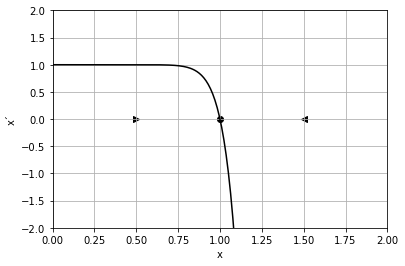

In [19]:
x=np.linspace(0, 2, 300)
d_x=np.zeros(len(x))

def Ejemplo2_22(x):
  dx=1-x**14
  return dx

dx=Ejemplo2_22(x)

plt.plot(x,dx, color='black')
plt.grid()
plt.axis([0,2,-2,2])
plt.scatter(1,0,color='black', marker='o')
plt.scatter(0.5,0,color='black', marker='>')
plt.scatter(1.5,0,color='black', marker='<')
plt.xlabel('x')
plt.ylabel('x´')

1.000033731419949


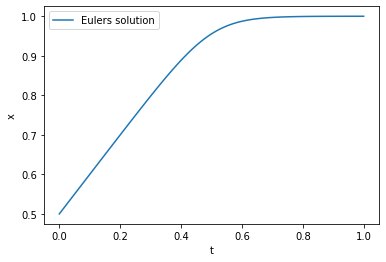

In [20]:
y_0=0.5
h=0.01
t_0=0
t_N=1

t_list,y_list=euler(h,Ejemplo2_22,y_0,t_0,t_N)
plt.plot(t_list,y_list, label='Eulers solution')

plt.legend()
plt.xlabel('t')
plt.ylabel('x')

print(np.abs(y_list[-1]-np.power(2,t_list[-1])))

inf


<ipython-input-19-52ef7d850c66>:5: RuntimeWarning: overflow encountered in double_scalars
  dx=1-x**14


Text(0.5, 1.0, 'Familia de Soluciones')

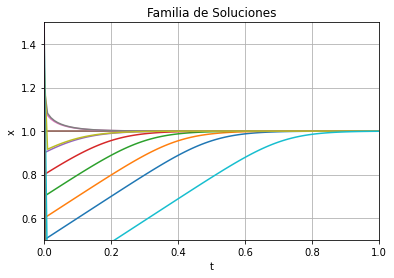

In [21]:
y_0=0.5
h=0.01
t_0=0
t_N=1
for i in np.arange(.5,10,0.1):
  t_list,y_list=euler(h,Ejemplo2_22,i, t_0,t_N)
  plt.plot(t_list,y_list, label='Euler')

print(np.abs(y_list[-1]-np.power(2,t_list[-1])))
plt.grid()
plt.axis([0,1,.5,1.5])
plt.xlabel('t')
plt.ylabel('x')
plt.title('Familia de Soluciones')

##**2.2.4**

\begin{equation}
\dot{x}=e^{-x}sin(x)
\end{equation}

**Solucion Analitica**

\begin{equation}
\frac{dx}{dt}=e^{-x}sin(x)\\
\int\frac{dx}{e^{-x}sin(x)}=\int{dt}\\
\end{equation}

No es posible continuar de manera analitica.

**Solución gráfica**

A continuación, se presenta la solución grafica en la cual se aprecia un punto fijo estable en $(0,0)$

**Solución numerica**

Luego se presenta la solución numérica y la familia de soluciones con el método de Euler tomando condiciones iniciales

\begin{equation}
x(0)=1
\end{equation}

Text(0, 0.5, 'x´')

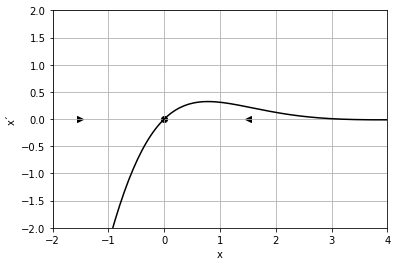

In [22]:
from sympy import pi
import matplotlib.pyplot as plt
import numpy as np

x=np.linspace(-2, 10, 300)
d_x=np.zeros(len(x))

def Ejemplo2_24(x):
  dx=np.sin(x)*np.exp(-x)
  return dx

dx=Ejemplo2_24(x)

plt.plot(x,dx, color='black')
plt.grid()
plt.axis([-2,4,-2,2])
plt.scatter(0,0,color='black', marker='o')
plt.scatter(-1.5,0,color='black', marker='>')
plt.scatter(1.5,0,color='black', marker='<')
plt.xlabel('x')
plt.ylabel('x´')

3.273390607896142e+150


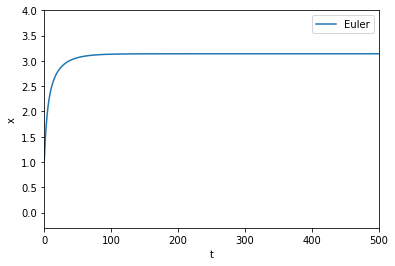

In [23]:
y_0=1
h=0.01
t_0=0
t_N=500

t_list,y_list=euler(h,Ejemplo2_24,y_0,t_0,t_N)
plt.plot(t_list,y_list, label='Euler')

plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.axis([0,500,-0.3,4])

print(np.abs(y_list[-1]-np.power(2,t_list[-1])))

3.273390607896142e+150


Text(0.5, 1.0, 'Familia de Soluciones')

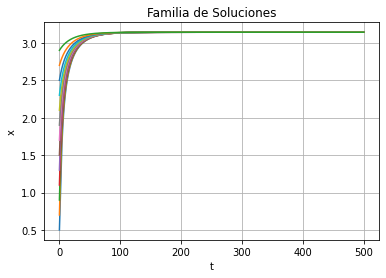

In [24]:
y_0=1
h=0.1
t_0=0
t_N=500
for i in np.arange(0.5,3,0.2):
  t_list,y_list=euler(h,Ejemplo2_24,i, t_0,t_N)
  plt.plot(t_list,y_list, label='Euler')

print(np.abs(y_list[-1]-np.power(2,t_list[-1])))
plt.grid()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Familia de Soluciones')

# 3.1.1

### Sistema 1: 

1. \begin{equation}
\dot { x } =1+rx+x^2
\end{equation}

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


[-sqrt(21)/2 + 5/2, sqrt(21)/2 + 5/2]


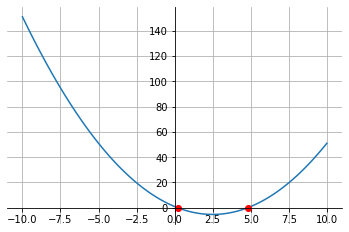

In [ ]:

x=np.linspace(-10,10,100)
r=-5
x_dot=1+r*x+x**2
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.spines['left'].set_position(('data',0.0))
ax.spines['bottom'].set_position(('data',0.0))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

#plt.axis([-5, 5, -5, 5])
plt.plot(x,x_dot)
plt.grid()

x=sp.symbols('x')
x_dot1=1+r*x+x**2
roots=sp.solve(x_dot1)
print(roots)
for j in range(len(roots)):
  plt.plot(roots[j],0,'ro')

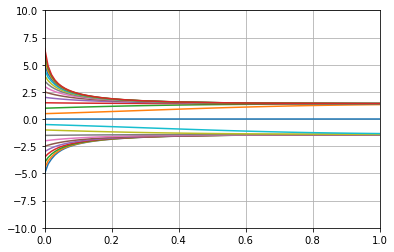

In [ ]:
def fun (t,x,r,b):
  #return 1+r*x+x**b
  return r*x-x**3
  

r,b=2,2

ti=0; tf=1; dt=100
tspam=[ti, tf]
t=np.linspace(ti,tf,dt)
for x0 in np.arange(-5,7,0.5):
  sol=solve_ivp(fun,tspam,[x0],args=(r,b),t_eval=t)
  plt.plot(sol.t, sol.y[0])

plt.axis([ti, tf, -10, 10])
plt.grid()




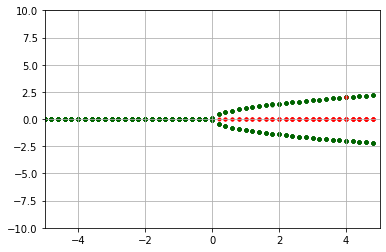

In [ ]:
ti=0; tf=100; dt=100
tspam=[ti, tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(fun,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')


plt.axis([-5, 5, -10, 10])
plt.grid()